# Load in the data

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.io.formats.printing import pprint_thing

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate, StratifiedKFold, LeaveOneOut, GridSearchCV, cross_val_score

from sklearn.metrics import f1_score, make_scorer

from sklearn.pipeline import make_pipeline, make_union, Pipeline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, MinMaxScaler

from sklearn.svm import SVC, LinearSVC



In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd  /gdrive/MyDrive/364/'SVM Comp'
%ls

/gdrive/MyDrive/364/SVM Comp
 SVM-competition-features.csv  'SVM Comp.ipynb'   SVMdata.csv


In [ ]:
df = pd.read_csv('SVMdata.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,target
0,73428,1040.181,396.1797,236.9738,74075,305.7637,0.8014,0.9913,0.7350,0.8528,1.6718,0.7718,0
1,91385,1190.488,485.5496,242.1273,92490,341.1085,0.8668,0.9881,0.7227,0.8103,2.0053,0.7025,0
2,69843,1026.683,408.7731,218.3650,70810,298.2061,0.8454,0.9863,0.6400,0.8326,1.8720,0.7295,0
3,78756,1211.882,529.8497,190.3297,79847,316.6627,0.9333,0.9863,0.7384,0.6739,2.7839,0.5976,1
4,65468,992.607,397.9589,209.9705,65953,288.7152,0.8495,0.9926,0.6746,0.8350,1.8953,0.7255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,81137,1126.696,426.4425,244.0338,83064,321.4138,0.8201,0.9768,0.7301,0.8032,1.7475,0.7537,0
1996,74790,1122.196,477.8444,199.7293,75609,308.5864,0.9085,0.9892,0.7218,0.7463,2.3925,0.6458,1
1997,91752,1219.544,498.3670,234.9741,92712,341.7927,0.8819,0.9896,0.5971,0.7752,2.1209,0.6858,1
1998,70796,1016.392,387.4363,233.6853,71449,300.2337,0.7976,0.9909,0.6775,0.8612,1.6579,0.7749,0


In [ ]:
df.target.value_counts() # super balanced dataset, which is great

0    1026
1     974
Name: target, dtype: int64

# Simple Exploration

In [ ]:
df.isna().sum() # no nan values

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
target    0
dtype: int64

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,target
0,73428,1040.181,396.1797,236.9738,74075,305.7637,0.8014,0.9913,0.7350,0.8528,1.6718,0.7718,0
1,91385,1190.488,485.5496,242.1273,92490,341.1085,0.8668,0.9881,0.7227,0.8103,2.0053,0.7025,0
2,69843,1026.683,408.7731,218.3650,70810,298.2061,0.8454,0.9863,0.6400,0.8326,1.8720,0.7295,0
3,78756,1211.882,529.8497,190.3297,79847,316.6627,0.9333,0.9863,0.7384,0.6739,2.7839,0.5976,1
4,65468,992.607,397.9589,209.9705,65953,288.7152,0.8495,0.9926,0.6746,0.8350,1.8953,0.7255,0


In [ ]:
df.shape

(2000, 13)

In [ ]:
# let's take a look at the percentage of zeros: 
df.isin([0]).sum()/df.shape[0]*100 


X1         0.0
X2         0.0
X3         0.0
X4         0.0
X5         0.0
X6         0.0
X7         0.0
X8         0.0
X9         0.0
X10        0.0
X11        0.0
X12        0.0
target    51.3
dtype: float64

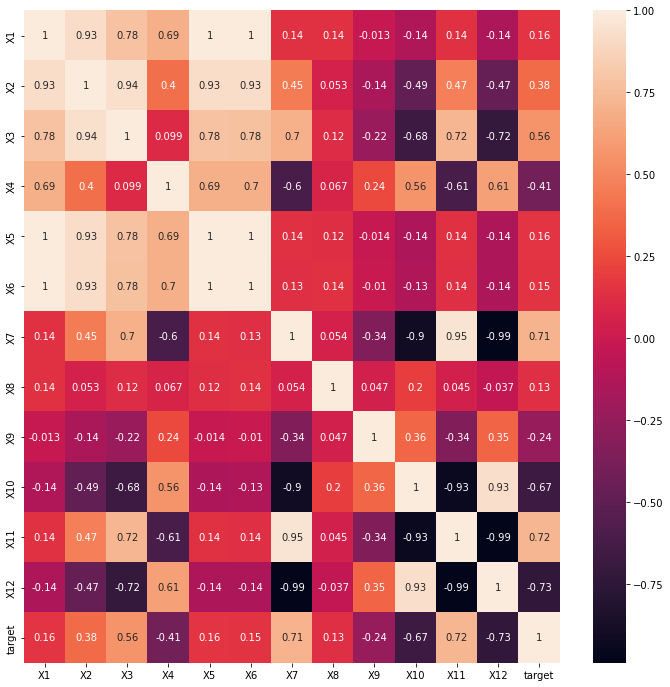

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12, 12


sns.heatmap(df.corr(), annot=True)


if we wanted to remove collinear variables (taking one with higher importance) 
- drop X7, X10, X11(collinear with X12) 
- drop X5 and X6 (collinear with X1)
- drop X2 (collinear with X3)

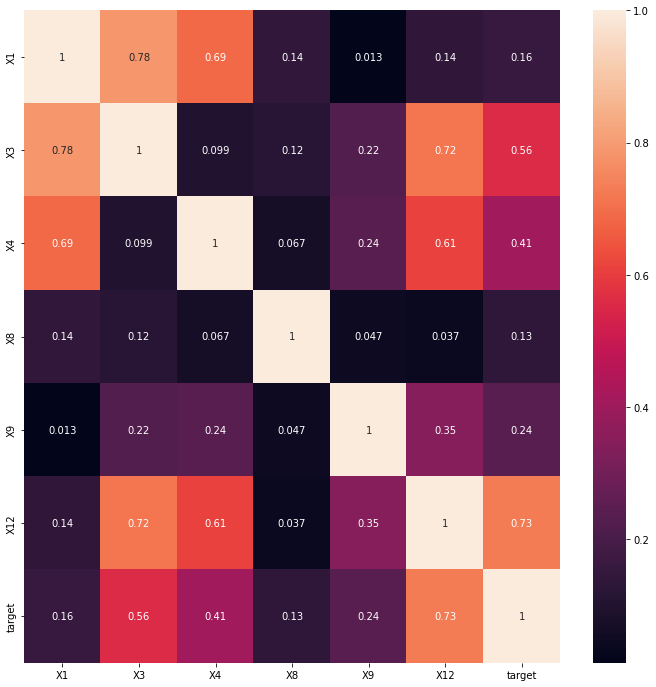

In [ ]:

sns.heatmap(abs(df.drop(columns=['X7', 'X10', 'X11', 'X5', 'X6', 'X2']).corr()), annot=True) 
# looks like we got everything
X_min = df.drop(columns=['X7', 'X10', 'X11', 'X5', 'X6', 'X2', 'target'])

In [ ]:
df.isnull().any()

X1        False
X2        False
X3        False
X4        False
X5        False
X6        False
X7        False
X8        False
X9        False
X10       False
X11       False
X12       False
target    False
dtype: bool

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,80778.448500,1131.295781,457.183226,225.834691,81626.480500,319.580077,0.861325,0.989544,0.693299,0.791227,2.044336,0.703646,0.487000
std,13623.527154,108.451185,55.619529,23.524227,13730.573541,26.818827,0.044904,0.003236,0.061033,0.055773,0.314557,0.052965,0.499956
min,47939.000000,868.485000,326.148500,152.171800,48366.000000,247.058400,0.658600,0.954200,0.468000,0.554600,1.329000,0.560800,0.000000
25%,70906.500000,1051.530250,415.857625,211.048475,71648.250000,300.467925,0.832475,0.988300,0.658200,0.751750,1.804725,0.662775,0.000000
50%,79275.000000,1124.353500,450.147150,224.791250,80081.500000,317.704350,0.864800,0.990300,0.713900,0.796950,1.991600,0.706250,0.000000
75%,90108.250000,1203.821750,493.508525,240.890700,90924.250000,338.717250,0.897400,0.991600,0.740525,0.833800,2.266625,0.742925,1.000000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.866500,1.000000


In [ ]:
for col in df.columns:
  print(col, len(df[col].value_counts()))


X1 1948
X2 1994
X3 2000
X4 1998
X5 1967
X6 1948
X7 1159
X8 158
X9 1228
X10 1295
X11 1829
X12 1248
target 2


In [ ]:
sns.pairplot(data=df)

Output hidden; open in https://colab.research.google.com to view.

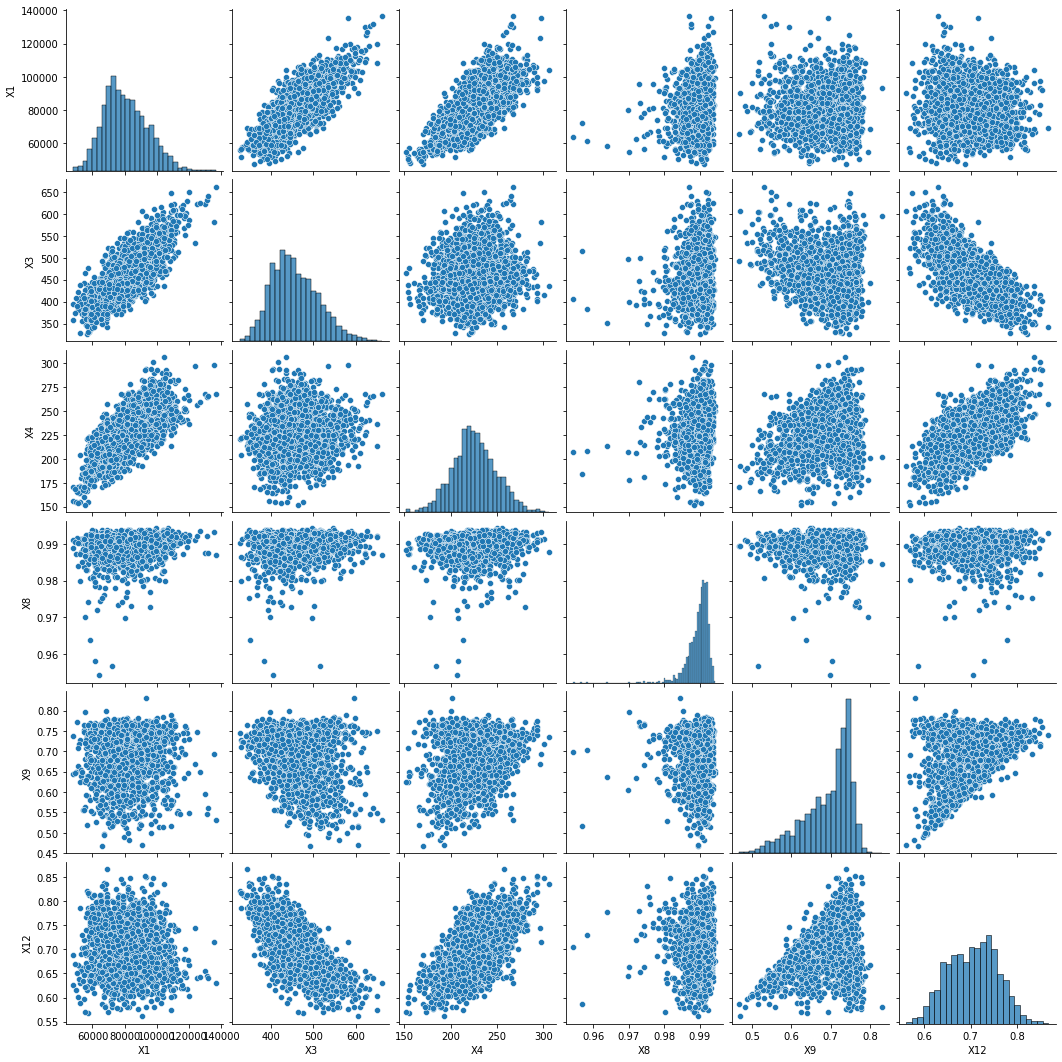

In [ ]:
sns.pairplot(data=X_min)

X8 and X9 don't look normal. Let's take a log transform and see if that helps

In [ ]:
X_min_log = X_min.copy()
X_min_log['X8'] = np.log(X_min_log['X8'])
X_min_log['X9'] = np.log(X_min_log['X9'])

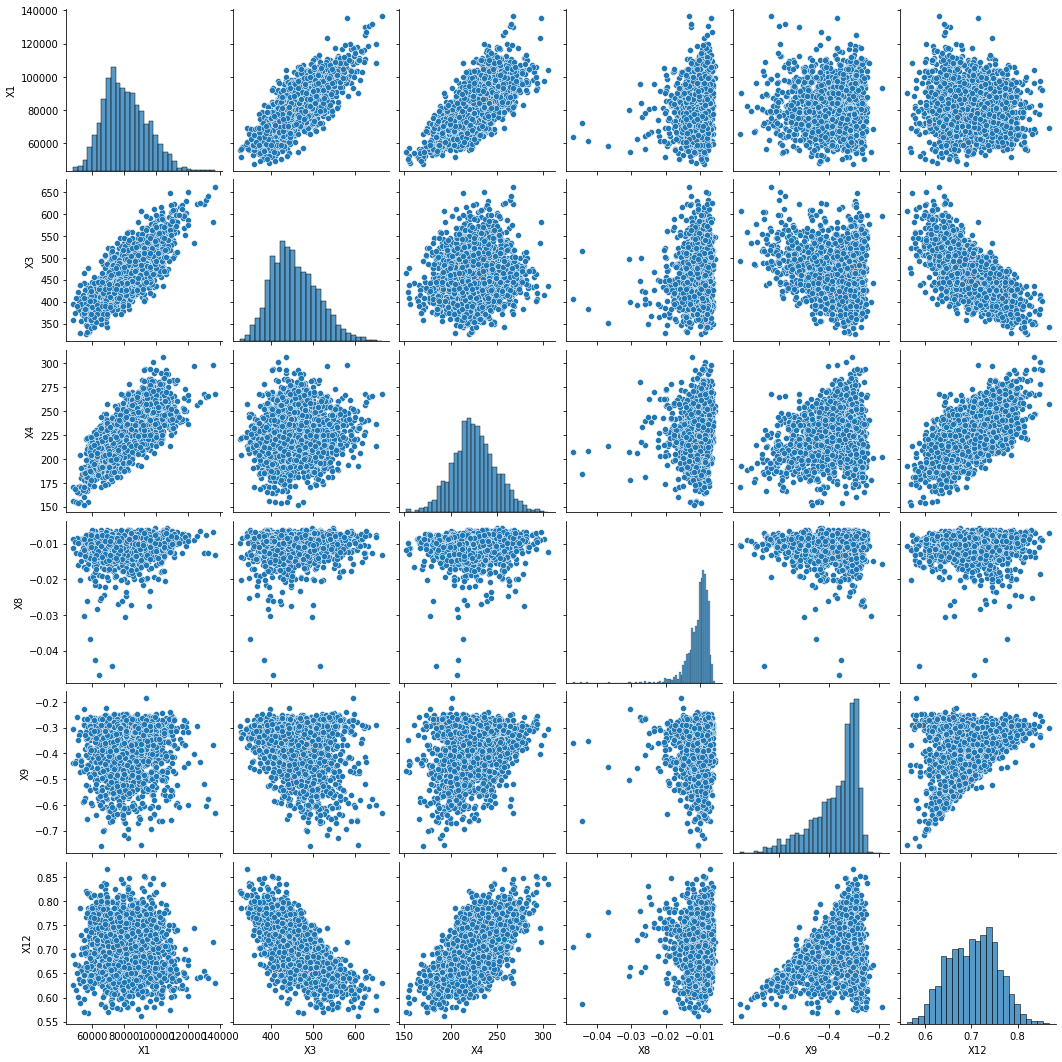

In [ ]:
sns.pairplot(data=X_min_log) 
# doesn't look better, let's just use X_min

# Base Model

In [ ]:
# set the random seed for reproducibility 
rng = np.random.RandomState(0)

In [ ]:
def score_stats(score):
  # return score, score.mean(), score.std()
    return ("scores: {} \n mean: {} \n std: {}").format(score, score.mean(), score.std())

In [ ]:
X=df.drop(columns=['target'])
y=df['target']

In [ ]:
best_score = 0 

# tested both X and Xmin and performance was very similiar, so we're using X_min
def evaluateSVC(pipe, X=X_min, y=df['target']):


  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
  # use stratified kfold so it has the same balance of class labels
  cv = StratifiedKFold(random_state=rng, shuffle=True)

  scorer = make_scorer(f1_score, average='macro')
  # let's use the cross_validate function instead so we can get train scores too to detect overfitting 
  score = cross_validate(pipe, X, y, return_train_score=True, cv=cv, scoring=scorer)
  test = score['test_score']
  train = score['train_score']
  print("Train Scores")
  print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
  print('\n')
  print("Test Scores:")
  print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))

  global best_score 
  if test.mean() > best_score:

    print('\n')
    print('######################')
    print('Current best score')
    print('######################')
    best_score =  test.mean()


In [ ]:
evaluateSVC(make_pipeline(SVC()))

Train Scores
Mean: 0.5222 	 STD: 0.0038


Test Scores:
Mean: 0.5209 	 STD: 0.0145


######################
Current best score
######################


In [ ]:
evaluateSVC(make_pipeline(StandardScaler(), SVC(random_state=rng))) # scaling is much better 

Train Scores
Mean: 0.8955 	 STD: 0.0019


Test Scores:
Mean: 0.884 	 STD: 0.0036


######################
Current best score
######################


In [ ]:
evaluateSVC(make_pipeline(LinearSVC(max_iter=3000)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Train Scores
Mean: 0.541 	 STD: 0.1496


Test Scores:
Mean: 0.5315 	 STD: 0.1457


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
evaluateSVC(make_pipeline(StandardScaler(), LinearSVC(max_iter=3000)))

Train Scores
Mean: 0.8826 	 STD: 0.0032


Test Scores:
Mean: 0.8818 	 STD: 0.0163


Train score is very close to test scores, which implies could be some underfitting. Let's try feature engineering and leave one out cross val 

# PCA and feature engineering

In [ ]:

evaluateSVC(make_pipeline(PolynomialFeatures(2), 
                         PCA(n_components='mle'),
                          StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.9064 	 STD: 0.0034


Test Scores:
Mean: 0.8838 	 STD: 0.014


In [ ]:

evaluateSVC(make_pipeline(PolynomialFeatures(2), 
                          StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8937 	 STD: 0.0021


Test Scores:
Mean: 0.8906 	 STD: 0.0119


######################
Current best score
######################


In [169]:

evaluateSVC(make_pipeline(PolynomialFeatures(2), 
                          MinMaxScaler(), 
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8878 	 STD: 0.0028


Test Scores:
Mean: 0.8856 	 STD: 0.014


In [175]:

evaluateSVC(make_pipeline(PolynomialFeatures(2), 
                          MinMaxScaler(), 
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8885 	 STD: 0.0047


Test Scores:
Mean: 0.885 	 STD: 0.0205


In [176]:

evaluateSVC(make_pipeline(PolynomialFeatures(2), 
                          MinMaxScaler((-1, 1)),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8906 	 STD: 0.0019


Test Scores:
Mean: 0.8861 	 STD: 0.0034


In [ ]:


evaluateSVC(make_pipeline(
    make_union(PolynomialFeatures(2), FunctionTransformer(np.log1p)),
     StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8934 	 STD: 0.0065


Test Scores:
Mean: 0.887 	 STD: 0.0257


In [ ]:


evaluateSVC(make_pipeline(PolynomialFeatures(2),
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p)),
     StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8936 	 STD: 0.0034


Test Scores:
Mean: 0.8855 	 STD: 0.0178


In [ ]:

evaluateSVC(make_pipeline(PolynomialFeatures(2),
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p)), PCA(n_components='mle'),
     StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.9113 	 STD: 0.0044


Test Scores:
Mean: 0.8783 	 STD: 0.019


In [ ]:
pipe = make_pipeline(
    make_union(FunctionTransformer(np.sqrt), FunctionTransformer(np.log1p), PolynomialFeatures(2)),  
     StandardScaler(),
    SVC(random_state=rng))

evaluateSVC(pipe)

Train Scores
Mean: 0.8946 	 STD: 0.0044


Test Scores:
Mean: 0.8875 	 STD: 0.0159


In [ ]:

evaluateSVC(make_pipeline(
   FunctionTransformer(np.sqrt),
    StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8941 	 STD: 0.0021


Test Scores:
Mean: 0.8901 	 STD: 0.0081


In [ ]:

evaluateSVC(make_pipeline(PolynomialFeatures(2), StandardScaler(),
                         SVC(random_state=rng)))


Train Scores
Mean: 0.8932 	 STD: 0.0024


Test Scores:
Mean: 0.8886 	 STD: 0.011


In [ ]:


evaluateSVC(make_pipeline(PolynomialFeatures(2), 
                         FunctionTransformer(np.log1p),
                           StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8937 	 STD: 0.0021


Test Scores:
Mean: 0.8881 	 STD: 0.0113


In [ ]:


evaluateSVC(make_pipeline(PolynomialFeatures(2, interaction_only=True), 
                         FunctionTransformer(np.log1p),
                           StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8929 	 STD: 0.0035


Test Scores:
Mean: 0.8891 	 STD: 0.015


In [ ]:


evaluateSVC(make_pipeline(PolynomialFeatures(3), 
                           StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.892 	 STD: 0.0055


Test Scores:
Mean: 0.8881 	 STD: 0.017


In [ ]:


evaluateSVC(make_pipeline(PolynomialFeatures(3), 
                         FunctionTransformer(np.log1p),
                           StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.892 	 STD: 0.0034


Test Scores:
Mean: 0.886 	 STD: 0.0171


In [ ]:


evaluateSVC(make_pipeline(PolynomialFeatures(4), 
                         FunctionTransformer(np.log1p),
                           StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.8898 	 STD: 0.0017


Test Scores:
Mean: 0.885 	 STD: 0.0064


In [ ]:

evaluateSVC(make_pipeline(PolynomialFeatures(2), 
                         FunctionTransformer(np.log1p),
                         PCA(n_components='mle'),
                           StandardScaler(),
                         SVC(random_state=rng)))

Train Scores
Mean: 0.9074 	 STD: 0.0016


Test Scores:
Mean: 0.8828 	 STD: 0.0157


# Nystroem (doesn't help)
https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html#sklearn.kernel_approximation.Nystroem

In [ ]:
from sklearn.kernel_approximation import Nystroem


clf = LinearSVC()
feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                n_components=300)
data_transformed = feature_map_nystroem.fit_transform(X, y)

clf.fit(data_transformed, y)

clf.score(data_transformed, y)

0.586

In [ ]:
from sklearn.kernel_approximation import Nystroem


clf = SVC()
feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                n_components=300)
data_transformed = feature_map_nystroem.fit_transform(X, y)

clf.fit(data_transformed, y)

clf.score(data_transformed, y)

0.586

# Hyperparamater Tuning: Random and Grid Search

In [184]:

param_grid = {
    'svc__C': [0.1, 1, 10, 100, 1000], 
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': np.arange(1, 5, 1),
    'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
}


In [185]:
for i in param_grid.keys():

  test_dict = {i: param_grid[i]}
  print('##########################################')
  print(test_dict)
  print('##########################################')

  search = GridSearchCV(best_pipe, test_dict, return_train_score=True, cv=3)

  search.fit(X_min, y)
  res = search.cv_results_
  best_param = list(search.best_params_.values())[0]
  loc_best_param = list(list(test_dict.values())[0]).index(best_param)

  # print averages from cv's for all runs from test and trani
  print([round(item, 4) for item in res['mean_test_score']])
  print([round(item, 4) for item in res['mean_train_score']])


  print('################ Best Param ################')
  print('Best Param: {}'.format(best_param))

  # print the mean and std of test and train scores for the best param
  print("Test")
  print("Mean {} STD {}".format((round(res['mean_test_score'][loc_best_param], 3)), round(res['std_test_score'][loc_best_param], 3)))
  print("Train")
  print("Mean {} STD {}".format((round(res['mean_train_score'][loc_best_param], 3)), round(res['std_train_score'][loc_best_param], 3)))

  print('\n')
  

  # unfortunately, I accidentaly ran all cells in the notebook and wrote over this one and it 
  # took a while to run so I didn't want to wait to do it again
  # and compiled the best ranges of parameters (written below) for use in a final grid search 

##########################################
{'svc__C': [0.1, 1, 10, 100, 1000]}
##########################################
[0.886, 0.887, 0.883, 0.878, 0.867]
[0.8905, 0.8958, 0.9028, 0.9088, 0.9243]
################ Best Param ################
Best Param: 1
Test
Mean 0.887 STD 0.013
Train
Mean 0.896 STD 0.006


##########################################
{'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
##########################################
[0.89, 0.853, 0.887, 0.768]
[0.8885, 0.8615, 0.8958, 0.7665]
################ Best Param ################
Best Param: linear
Test
Mean 0.89 STD 0.011
Train
Mean 0.888 STD 0.005


##########################################
{'svc__degree': array([1, 2, 3, 4])}
##########################################
[0.887, 0.887, 0.887, 0.887]
[0.8958, 0.8958, 0.8958, 0.8958]
################ Best Param ################
Best Param: 1
Test
Mean 0.887 STD 0.013
Train
Mean 0.896 STD 0.006


##########################################
{'svc__gamma': ['scale', '

## observations: 
- C: best at 1 (although likely to change with gamma (should do dual search). Best between 0.1 and 10
- kernel: linear and rbf are good
- degree: makes no difference
- gamma: all are decent

should do a param test between C and gamma

In [192]:
best_pipe = make_pipeline(PolynomialFeatures(2), 
                          StandardScaler(),
                         SVC(random_state=rng))

scorer = make_scorer(f1_score, average='macro')

param_grid = {
    "svc__C": np.linspace(0.1, 10, 5),
    "svc__gamma": ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001]
}

search = GridSearchCV(best_pipe, param_grid, n_jobs=-1, scoring=scorer, cv=3, verbose=2)
search.fit(X_min, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
# doesn't do better than the default model 

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best parameter (CV score=0.890):
{'svc__C': 5.05, 'svc__gamma': 0.01}


# Creating the best model and outputs

In [215]:
# verify we are getting good results
best_pipe = make_pipeline(PolynomialFeatures(2), 
                          StandardScaler(),
                         SVC(random_state=rng))


scorer = make_scorer(f1_score, average='macro')

# let's use the cross_validate function instead so we can get train scores too to detect overfitting 
score = cross_validate(best_pipe, X_min, y, return_train_score=True, cv=5, scoring=scorer)
test = score['test_score']
train = score['train_score']
print("Train Scores")
print("Mean: {} \t STD: {}".format(round(train.mean(), 4), round(train.std(), 4)))
print('\n')
print("Test Scores:")
print("Mean: {} \t STD: {}".format(round(test.mean(), 4), round(test.std(), 4)))


# nothing crazy in terms of results


Train Scores
Mean: 0.8945 	 STD: 0.0042


Test Scores:
Mean: 0.8875 	 STD: 0.0177


## output

In [216]:
x_comp = pd.read_csv("SVM-competition-features.csv", header=None)

In [217]:
x_comp

,0,1,2,3,4,5,6,7,8,9,10,11
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463
1,55723,941.402,388.8176,182.9275,56225,266.3620,0.8824,0.9911,0.5919,0.7901,2.1255,0.6851
2,74525,1153.205,478.0779,200.0458,76573,308.0392,0.9082,0.9733,0.5578,0.7042,2.3898,0.6443
3,96357,1250.211,512.6364,240.1253,97308,350.2650,0.8835,0.9902,0.7325,0.7747,2.1349,0.6833
4,67306,998.616,375.0199,229.2614,68240,292.7399,0.7914,0.9863,0.6897,0.8481,1.6358,0.7806
...,...,...,...,...,...,...,...,...,...,...,...,...
495,67314,1012.587,400.4162,215.2215,67997,292.7573,0.8433,0.9900,0.6561,0.8250,1.8605,0.7311
496,69397,1005.442,396.2666,223.6121,69973,297.2524,0.8256,0.9918,0.7414,0.8627,1.7721,0.7501
497,78351,1106.408,437.9891,228.2666,79359,315.8474,0.8535,0.9873,0.7448,0.8043,1.9188,0.7211
498,72882,1046.463,407.2730,228.8424,74144,304.6248,0.8272,0.9830,0.6690,0.8363,1.7797,0.7480


In [218]:
x_comp = x_comp.drop(columns=[6, 9, 10, 4, 5, 1])

In [220]:


best_pipe.fit(X_min, y)



results = best_pipe.predict(x_comp)
results = results.reshape(-1,)

results_df = pd.DataFrame(results, columns=[0])

results_df.to_csv('SVM-ypred.csv',index=False, header=None)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


In [221]:
results.shape

(500,)

In [222]:
# verify I did it right: 
sample_target = pd.read_csv('SVM-sample-target.csv', header=None)
sample_features = pd.read_csv('SVM-sample-features.csv', header=None)

sample_features = sample_features.drop(columns=[6, 9, 10, 4, 5, 1])


test_results = best_pipe.predict(sample_features)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


In [223]:
test_results = test_results.reshape(-1,)
test_df = pd.DataFrame(test_results, columns=[0])
# test_results.shape
test_df


,0
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,1
97,0
98,0


In [224]:
test_df.to_csv('test-ypred.csv', index=False, header=None)

In [225]:
sample_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,1
97,0
98,0


In [226]:
test_in = pd.read_csv('test-ypred.csv', header=None)
test_in

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,1
97,0
98,0
